In [304]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas
import scipy

In [305]:
def twodisncis (mat1,dis1,dis2):#,m,n):
    #hic1 = mat1[m==n-dis1][:-abs(dis2-dis1)]###remove last few elements to make two array same length
    #hic2 = mat1[m==n-dis2]
    hic1 = np.diag(mat1,k=dis1)[:-abs(dis2-dis1)]
    hic2 = np.diag(mat1,k=dis2)
    #hic1 = np.round(hic1,decimals=1)
    #hic2 = np.round(hic2,decimals=1)
    ind = list(np.unique(hic1+hic2))
    #ind = filter(lambda a: a != 0, ind)
    div = dict((key, [0,0]) for key in ind)
    for j in range(0,len(hic1)):
        div[(hic1[j]+hic2[j])][0] += float(hic1[j])
        div[(hic1[j]+hic2[j])][1] += float(hic2[j])
    return div

In [306]:
def twodisncis3 (mat1,dis1,dis2,m,n):
    hic1 = np.diag(mat1,k=dis1)[:-abs(dis2-dis1)]
    hic2 = np.diag(mat1,k=dis2)
    f1 = np.mean(hic1)/np.var(hic1)
    f2 = np.mean(hic2)/np.var(hic2)
    hic1 = np.round(hic1 * f1)
    hic2 = np.round(hic2 * f2)
    sumh = hic1+hic2
    maxh = np.max(sumh)
    minh = np.min(sumh)
    div = dict((key, [0,0]) for key in range(int(minh),int(maxh)+1))
    for j in range(int(minh),int(maxh)+1):
        t = np.where(sumh==j)[0]
        div[j][0] = np.sum(hic1[t])/f1
        div[j][1] = np.sum(hic2[t])/f2
    return div

In [307]:
def twodisncis2 (mat1,dis1,dis2):
    m,n=np.indices(mat1.shape)
    hic1 = mat1[m==n-dis1][abs(dis2-dis1)::]###remove first few elements to make two array same length
    hic2 = mat1[m==n-dis2]
    #hic1 = hic1.astype(int)
    #hic2 = hic2.astype(int)
    ind = list(np.unique(hic1+hic2))
    #ind = filter(lambda a: a != 0, ind)
    div = dict((key, [0,0]) for key in ind)
    for j in range(0,len(hic1)):
        div[(hic1[j]+hic2[j])][0] += float(hic1[j])
        div[(hic1[j]+hic2[j])][1] += float(hic2[j])
    return div

In [308]:
def twodishic (mat1,dis1,dis2):
    m,n=np.indices(mat1.shape)
    hic1 = mat1[m==n-dis1][:-abs(dis2-dis1)]###remove last few elements to make two array same length
    hic2 = mat1[m==n-dis2]
    hic1 = hic1.astype(int)
    ind = xrange(0,len(hic1))
    print len(hic1), len(hic2)
    div = dict((key, [0,0]) for key in ind)
    for j in range(0,len(hic1)):
        div[j][0] = float(hic1[j])
        div[j][1] = float(hic2[j])
    return div

In [309]:
%time exphic2 = np.load('/Users/linan/Desktop/HiCtest/chr18_10kb.npy')

CPU times: user 2.76 ms, sys: 757 ms, total: 760 ms
Wall time: 1.15 s


In [310]:
loop = np.loadtxt('/Users/linan/Desktop/HiCtest/Gm12878.chr18.loops')

yloop = (loop[:,2]-loop[:,1])/10000
yloop = yloop.astype(int)

lloop = loop[:,1]/10000
lloop = lloop.astype(int)
rloop = loop[:,2]/10000
rloop = rloop.astype(int)

xloop = exphic2[lloop,rloop]+exphic2[lloop,rloop+1]

In [311]:
Arrowhead = pandas.read_table('/Users/linan/Box/TADcalling/Arrowhead.Gm12878',sep='\t',header=None)
tad=Arrowhead.loc[Arrowhead[0]=='18',0:2].values
ytad = (tad[:,2]-tad[:,1])/10000
ytad = ytad.astype(int)

ltad = tad[:,1]/10000
ltad = ltad.astype(int)
rtad = tad[:,2]/10000
rtad = rtad.astype(int)

xtad = exphic2[ltad,rtad]+exphic2[ltad,rtad+1]

In [14]:
%time h = twodishic(exphic2+1,50,51)

plt.figure(2)
ax1 = plt.subplot2grid((4, 2), (0, 0), colspan=2,rowspan=2)
ax1.scatter(x,y, s=10, edgecolor='',label='test',linewidth=3)

ax2 = plt.subplot2grid((4, 2), (2, 0), colspan=2)
ax2.plot(h.keys(), np.array(h.values())[:,0], color='r')
plt.ylabel('Low dist')
plt.tight_layout()

ax3 = plt.subplot2grid((4, 2), (3, 0), colspan=2)
ax3.plot(h.keys(), np.array(h.values())[:,1], color='r')
plt.ylabel('High dist')
plt.xlabel('bin (10kb)')
plt.show()

19752 19752
CPU times: user 13.3 s, sys: 49.2 s, total: 1min 2s
Wall time: 1min 35s


In [69]:
%%time
d1 = np.array([])
d2 = np.array([])
for j in range(0,50):
    d = twodisncis3(exphic2+1,j,j+1)

Wall time: 3min 23s


In [312]:
%%time
y=[]
x=[]
z=[]
d1 = []
d2 = []
#m1,n1=np.indices(exphic2.shape)
for j in range(0,499):
    d = twodisncis(exphic2+1,j,j+1)
    for i in d.keys():
        u = d[i]
        if u[0] != 0 and u[1] != 0:
            x.append(i)
            y.append(j)
            z.append(u[0]/float(u[1]))
            d1.append(u[0])
            d2.append(u[1])
x = np.array(x)
y = np.array(y)
z = np.log10(np.array(z))
d1 = np.array(d1)
d2 = np.array(d2)

CPU times: user 1min 23s, sys: 2min 10s, total: 3min 34s
Wall time: 3min 37s


In [313]:
#mat = np.zeros((500,int(np.max(x)+1)))
mat = np.full([500, int(np.max(x)+1)], np.nan)

In [314]:
for q in range(0,len(x)):
    mat[int(y[q]),int(x[q])]=z[q]

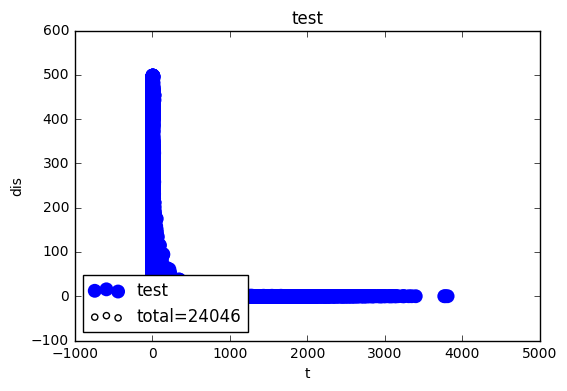

In [315]:
# Plot
plt.scatter(x, y, s=100, edgecolor='',label='test',linewidth=3)
plt.scatter(0,0,label='total={1}'
            ''.format(2, np.shape(y)[0]),c='w')
#plt.plot(x,np.array([np.mean(y) for i in xrange(len(x))]),c='r',label='mean={1}' ''.format(2, np.mean(y)))
plt.title('test')
plt.xlabel('t')
plt.ylabel('dis')
#plt.xlim(0,4)
plt.legend(loc=3)
plt.show()

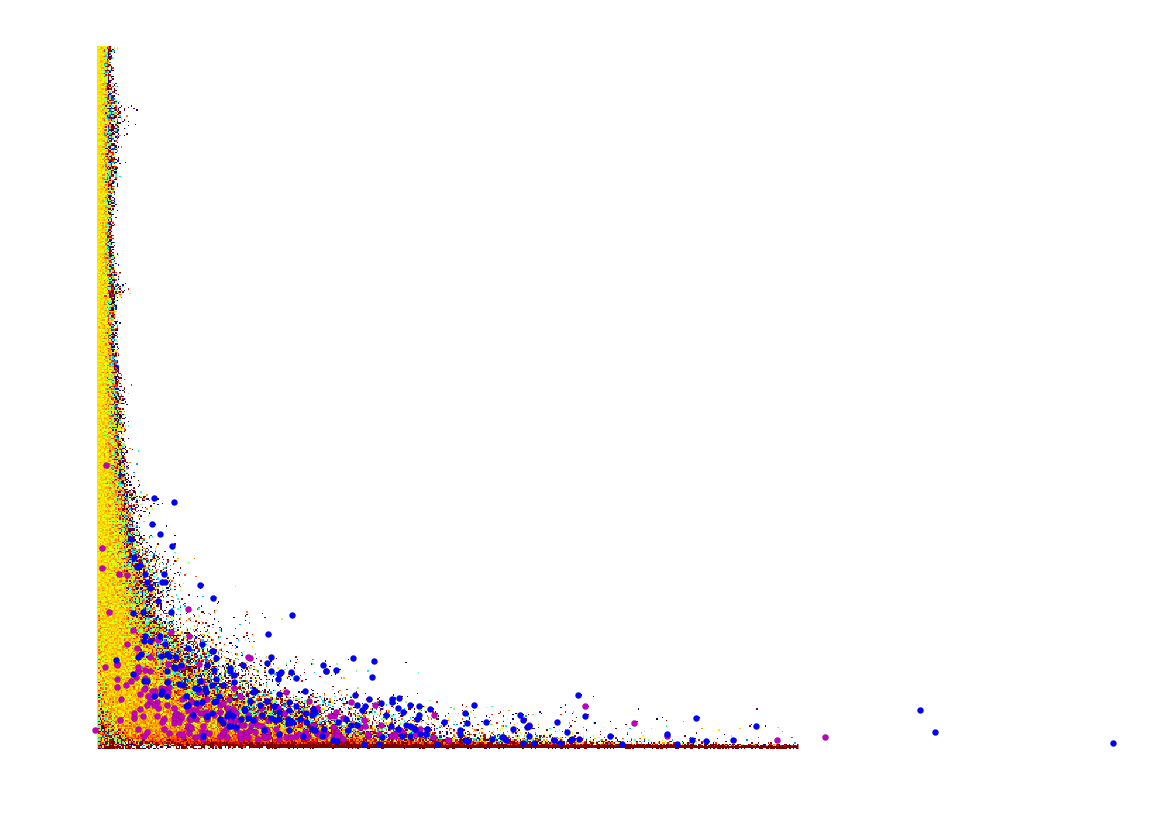

In [316]:
fig = plt.figure(0,figsize=(20,10))
cmap = matplotlib.cm.jet
cmap.set_bad('white',1.)
plt.imshow(mat[:,0:500], cmap=cmap, interpolation='none', origin='lower',vmin = -0.2, vmax = 0.1)
plt.scatter(xtad,ytad,c='m',linewidths=0.1)
plt.scatter(xloop,yloop,c='b',linewidths=0.1)
#plt.scatter(1000,20,c='b')
plt.axis('off')
#plt.colorbar()
plt.show()
#fig.savefig("/Users/linan/Dropbox/NCISbydis.png", dpi=1500)

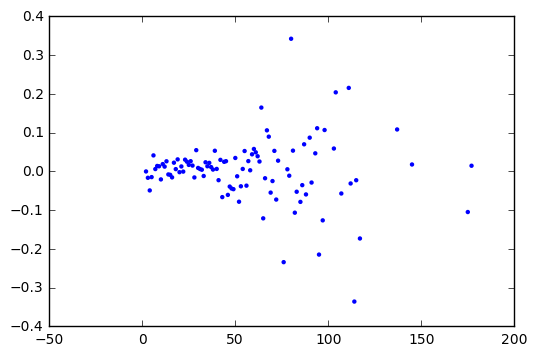

In [317]:
plt.figure(3)
plt.scatter(xrange(1000),mat[50,0:1000], s=10, edgecolor='',label='test',linewidth=3)
plt.show()

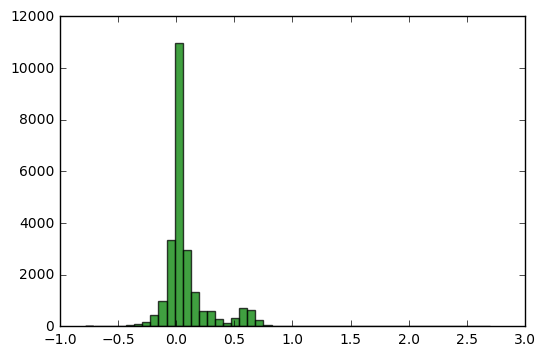

In [318]:
plt.figure(10)
n, bins, patches = plt.hist(z, 50, facecolor='green', alpha=0.75)
plt.show()

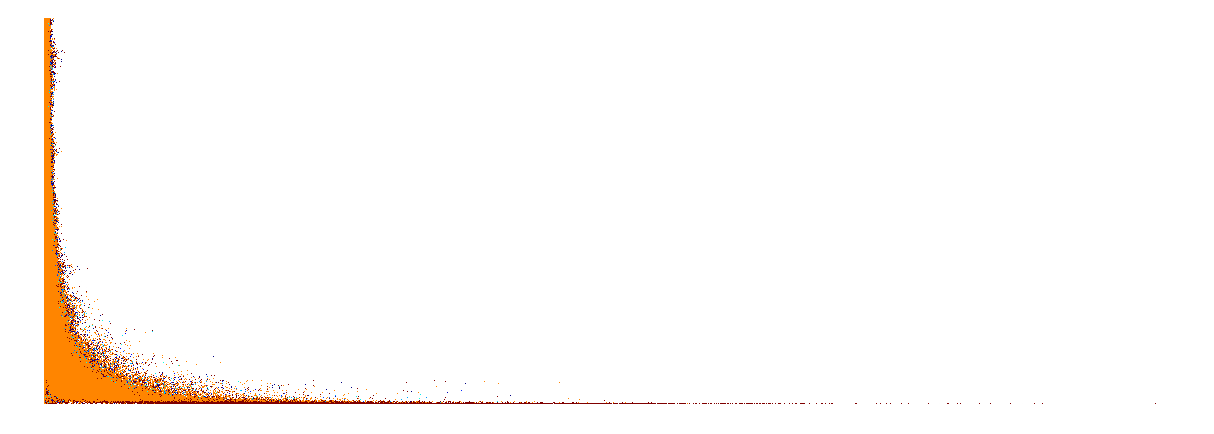

In [319]:
plt.figure(0)
plt.subplots(1,1,figsize=(100,5))
mat1 = np.copy(mat)
mat1[abs(mat1)<np.std(z)/2]=0
plt.imshow(mat1[:,0:1500], cmap='jet', interpolation='none', origin='lower',vmin = -0.2, vmax = 0.06)
#plt.scatter(xloop,yloop,c='b',linewidths=0.1)
plt.axis('off')
plt.show()

In [320]:
x1 = np.where(abs(mat)>=np.std(z)/2)
nn = x1[0]*x1[1]

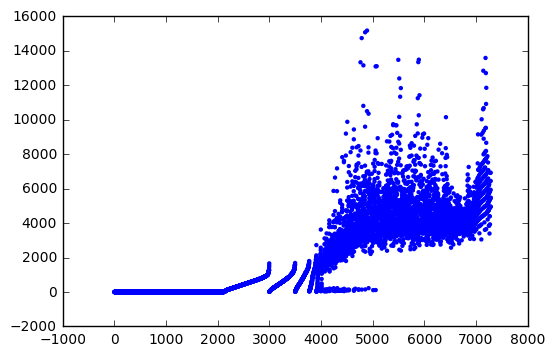

In [321]:
plt.figure(3)
plt.scatter(xrange(len(nn)),nn, s=10, edgecolor='',label='test',linewidth=3)
plt.show()

In [322]:
x11=x1[0][np.where(nn>=1000)]
x22=x1[1][np.where(nn>=1000)]
x33=x1[0][np.where(nn<1000)]
x44=x1[1][np.where(nn<1000)]

In [323]:
x11u = np.unique(x11)
x22f = np.array([])
x11f = np.array([])
for o in x11u:
    x22f=np.append(x22f,np.min(x22[np.where(x11==o)]))
    x11f=np.append(x11f,o)

In [324]:
x33u = np.unique(x33)
x44f = np.array([])
x33f = np.array([])
for o in x33u:
    x44f=np.append(x44f,np.max(x44[np.where(x33==o)]))
    x33f=np.append(x33f,o)

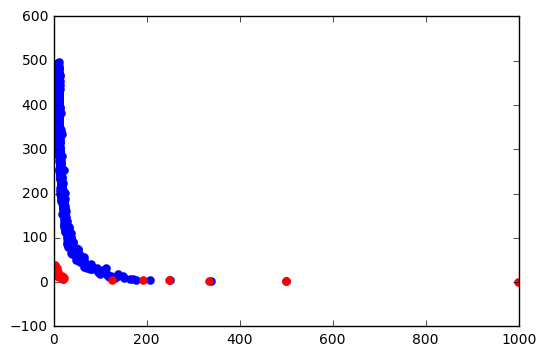

In [325]:
plt.figure(4)
plt.scatter(x22f,x11f, s=10, edgecolor='b',label='test',linewidth=3)
plt.scatter(x44f,x33f, s=10, edgecolor='r',label='test',linewidth=3)
plt.xlim(0,1000)
plt.show()

In [326]:
import statsmodels.api as sm
from scipy.interpolate import interp1d
lowess = sm.nonparametric.lowess
lfit = lowess(x22f, x11f,frac=1./10)
f = interp1d(list(zip(*lfit))[0], list(zip(*lfit))[1], bounds_error=False)

In [327]:
lfit2 = lowess(x44f, x33f,frac=1./10)
f2 = interp1d(list(zip(*lfit2))[0], list(zip(*lfit2))[1], bounds_error=False)

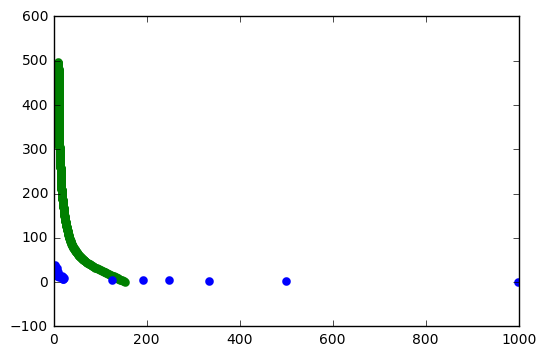

In [328]:
plt.figure(5)
plt.scatter(lfit[:,1],x11f, s=10, edgecolor='g',label='far',linewidth=3)
plt.scatter(lfit2[:,1],x33f, s=10, edgecolor='b',label='near',linewidth=3)
plt.xlim(0,1000)
plt.show()

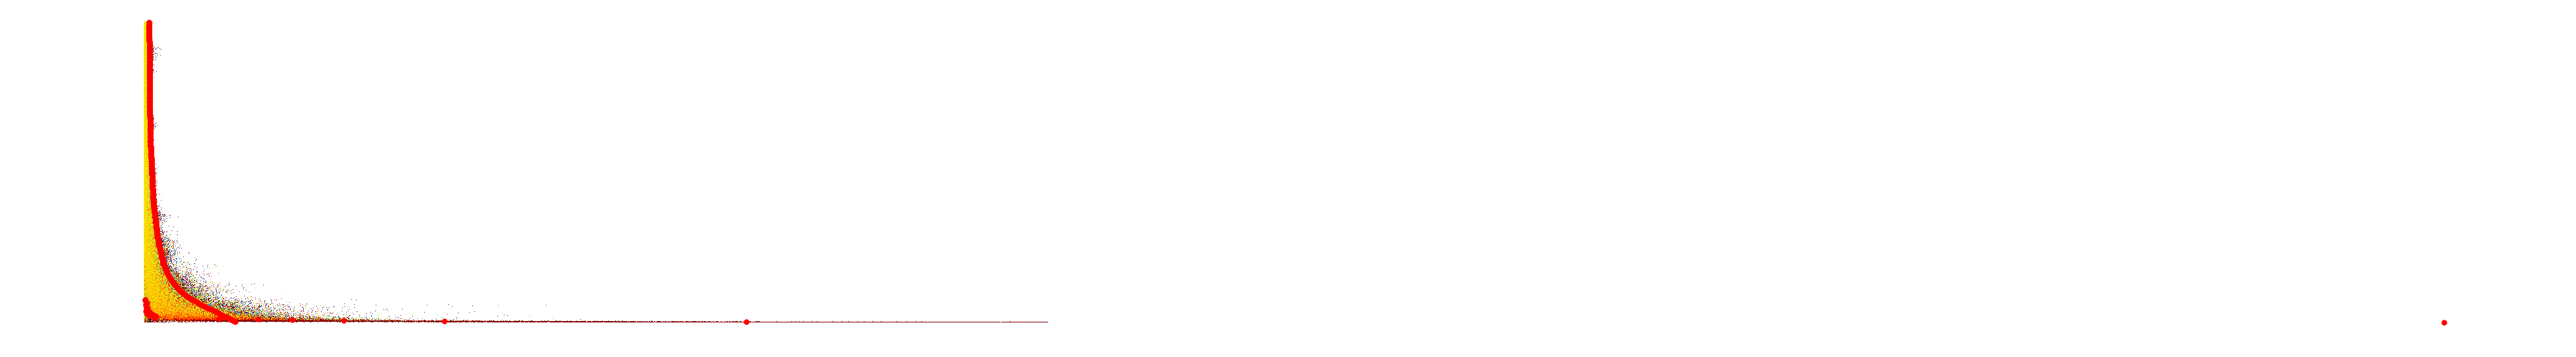

In [366]:
fig = plt.figure(10,figsize=(50,25))
plt.imshow(mat[:,0:1500], cmap='jet', interpolation='none', origin='lower',vmin = -0.2, vmax = 0.1)
plt.scatter(lfit[:,1],x11f, s=10, edgecolor='r',label='test',linewidth=3)
plt.scatter(lfit2[:,1],x33f, s=10, edgecolor='r',label='near',linewidth=3)
#plt.scatter(xloop,yloop,c='b',linewidths=0.1)
#plt.scatter(x22f,x11f, s=10, edgecolor='b',label='test',linewidth=3)
plt.axis('off')
plt.show()
#fig.savefig("/Users/linan/Dropbox/NCISbydis2.png", dpi=1500)

In [409]:
r=np.array([])
for j in range(0,500):
    indinx = np.where(y==j)[0]
    t1 = 0
    t2 = 0
    if np.isnan(f(j)):
        tmax = 0
    else:
        tmax = f(j)
    if np.isnan(f2(j)):
        tmin = 0
    else:
        tmin = f2(j) 
    for i in indinx:     
        if x[i]<=tmax and x[i]>=tmin:
            t1 += d1[i]
            t2 += d2[i]
    r=np.append(r,(t1+0.01)/float(t2+0.01))

In [339]:
####Remove the low frequent and high frequent regions
testmat = np.copy(exphic2)
for j in range(10,500):
    if np.isnan(f(j)):
        tmax = 0
    else:
        tmax = f(j)
    if np.isnan(f2(j)):
        tmin = 0
    else:
        tmin = f2(j)
    hic1 = np.diag(exphic2,k=j)[:-abs(1)]
    hic2 = np.diag(exphic2,k=j+1)
    indtest = hic1 + hic2
    n=0
    for i in range(0,len(indtest)):
        if indtest[i] <= tmin:
            testmat[i,min(i+j,np.shape(testmat[0]))]=0
            testmat[min(i+j,np.shape(testmat[0])),i]=0
        elif indtest[i] >= tmax:
            testmat[i,min(i+j,np.shape(testmat[0]))]=2
            testmat[min(i+j,np.shape(testmat[0])),i]=2
        else:
            testmat[i,min(i+j,np.shape(testmat[0]))]=1
            testmat[min(i+j,np.shape(testmat[0])),i]=1            
            n+=1
    #print float(n)/len(indtest)

In [399]:
def bydiscorrection (mat1,lowerb, totaldis, rlist):
    m,n=np.indices(mat1.shape)
    newm = np.zeros(mat1.shape)
    for i in range(lowerb+1,totaldis):
        hic1 = mat1[m==n-i]
        newm[m==n-i] = hic1*np.prod(rlist[lowerb:(i+1)])
        newm[m==n+i] = hic1*np.prod(rlist[lowerb:(i+1)])
    return newm

In [392]:
def bydisdivmean (mat1,lowerb, totaldis):
    m,n=np.indices(mat1.shape)
    newm = np.zeros(mat1.shape)
    for i in range(lowerb+1,totaldis):
        hic1 = mat1[m==n-i]
        newm[m==n-i] = hic1/np.mean(hic1)
        newm[m==n+i] = hic1/np.mean(hic1)
    return newm

In [377]:
r[r<1]=1

In [378]:
len(r)

490

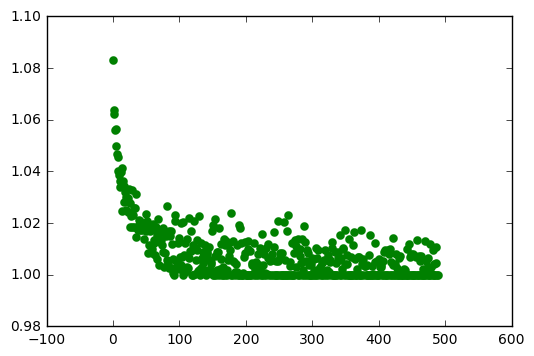

In [379]:
plt.figure(5)
plt.scatter(xrange(490),r, s=10, edgecolor='g',label='far',linewidth=3)
plt.show()

In [410]:
np.prod(r)

34.824217808046477

In [408]:
np.mean(np.diag(exphic2,k=10))/np.mean(np.diag(exphic2,k=500))

65.797925884101815

In [381]:
np.max(testmat[6000:7000,6000:7000])

2625.0

In [401]:
adjmat = bydiscorrection(exphic2,10,500,r)

KeyboardInterrupt: 

In [383]:
divmeanmat = bydisdivmean(exphic2,5,500)

KeyboardInterrupt: 

In [70]:
adjmattest = bydiscorrection(testmat,5,500,r)

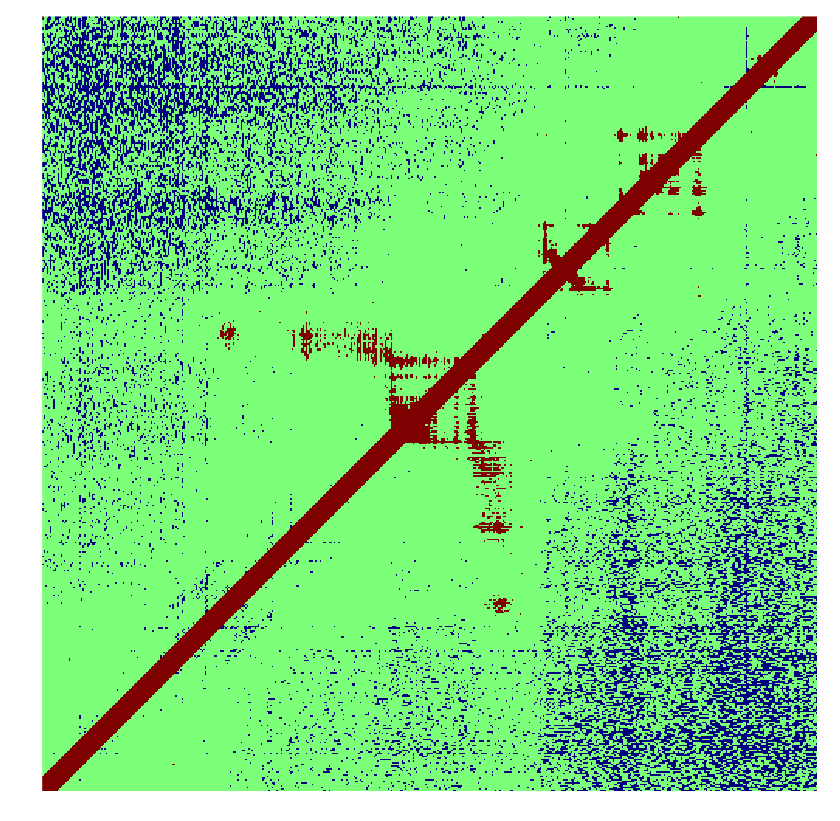

In [340]:
plt.figure(2)
fig, axs = plt.subplots(1,1,figsize=(10,10))
axs.imshow(testmat[4000:4500,4000:4500], cmap=matplotlib.cm.jet, interpolation='none', origin='lower',vmin = 0, vmax = 2, aspect=1,extent=[0,500,0,500])
plt.axis('off')
plt.show()

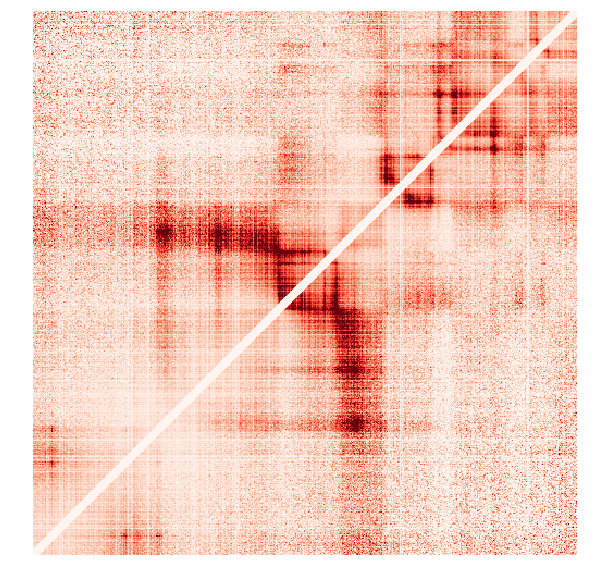

In [38]:
plt.figure(2)
fig, axs = plt.subplots(1,1,figsize=(10,10))
axs.imshow(adjmat[4000:4500,4000:4500], cmap=plt.cm.Reds, interpolation='none', origin='lower',vmin = 0, vmax = 550, aspect=1,extent=[0,500,0,500])
plt.axis('off')
plt.show()

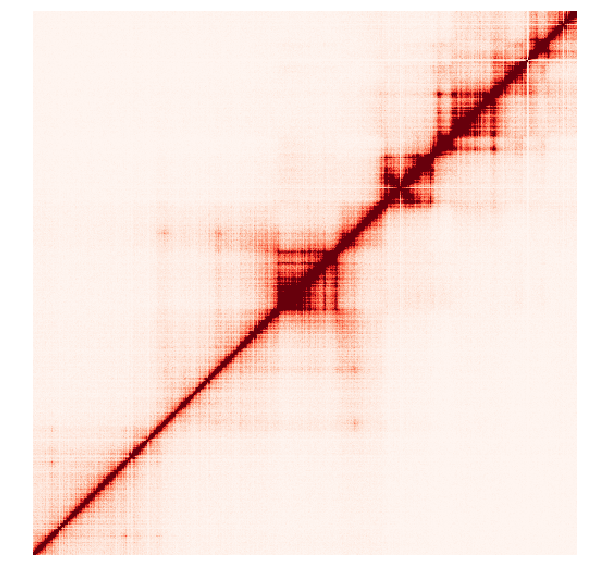

In [172]:
plt.figure(2)
fig, axs = plt.subplots(1,1,figsize=(10,10))
axs.imshow(exphic2[4000:4500,4000:4500], cmap=plt.cm.Reds, interpolation='none', origin='lower',vmin = 0, vmax = 150, aspect=1,extent=[0,500,0,500])
plt.axis('off')
plt.show()

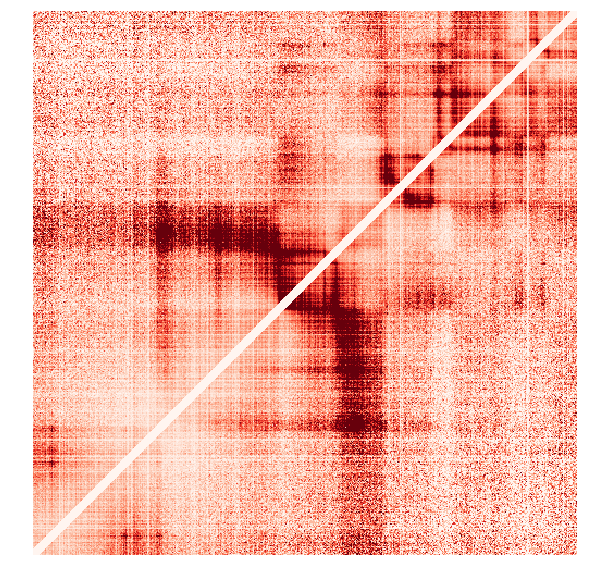

In [137]:
plt.figure(2)
fig, axs = plt.subplots(1,1,figsize=(10,10))
axs.imshow(divmeanmat[4000:4500,4000:4500], cmap=plt.cm.Reds, interpolation='none', origin='lower',vmin = 0, vmax = 3, aspect=1,extent=[0,500,0,500])
plt.axis('off')
plt.show()

In [169]:
testm = np.copy(divmeanmat[4000:4500,4000:4500])

In [173]:
def getcor (mat):
    cormat = np.zeros(np.shape(mat))
    n = np.shape(mat)[0]
    for i in range(0,n):
        for j in range(i,n):
            cor = np.corrcoef(mat[i,:],mat[j,:])[0,1]
            if not np.isnan(cor):
                cormat[i,j] = cor
                cormat[j,i] = cor
    return cormat

In [174]:
testcorm = getcor(testm)

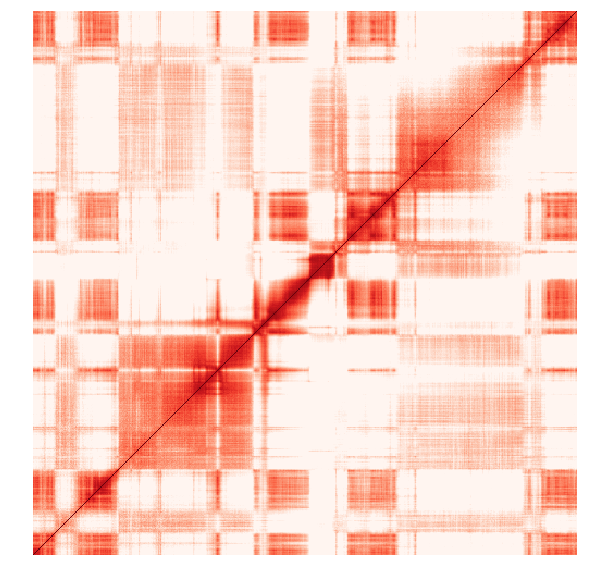

In [175]:
plt.figure(12)
fig, axs = plt.subplots(1,1,figsize=(10,10))
axs.imshow(testcorm, cmap=plt.cm.Reds, interpolation='none', origin='lower',vmin = 0, vmax = 1, aspect=1,extent=[0,500,0,500])
plt.axis('off')
plt.show()

In [189]:
def loopvsadjacent (hicmat,looplist,winsize,dismin):
    looplist = looplist[(looplist[:,2]-looplist[:,1])>dismin*10000]
    loopint = hicmat[looplist[:,1].astype(int)/10000,looplist[:,2].astype(int)/10000]
    adjint = np.zeros((len(loopint)))
    for i in range(0-winsize,winsize+1):
        for j in range(0-winsize,winsize+1):
            if i != 0 and j!=0:
                adjint += hicmat[looplist[:,1].astype(int)/10000+i,looplist[:,2].astype(int)/10000+j]
    fold = loopint*((2*winsize+1)**2-1)/adjint
    return fold

In [190]:
rawf = loopvsadjacent(exphic2,loop,2,5)
ncisf = loopvsadjacent(adjmat,loop,2,5)
distf = loopvsadjacent(divmeanmat,loop,2,5)

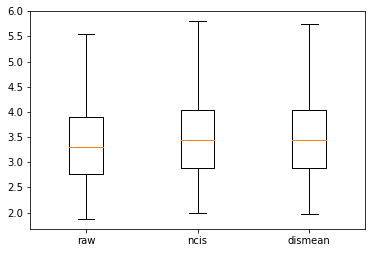

In [191]:
plt.figure(5)
plt.boxplot([rawf,ncisf,distf],0, '')
plt.xticks([1,2,3],
           ["raw","ncis","dismean"])
plt.show()

In [192]:
from scipy import stats

In [194]:
stats.ttest_ind(ncisf,distf)

Ttest_indResult(statistic=-0.0017720809586208128, pvalue=0.99858691422268231)

In [341]:
Biasmat = pandas.read_table('/Users/linan/Desktop/HiCtest/F_GC_M_MboI_10Kb_el.hg19.txt', header=None)

In [342]:
chr18bias = Biasmat.loc[Biasmat[0] == 'chr18'].loc[:,3:5].as_matrix()
chr18loc = Biasmat.loc[Biasmat[0] == 'chr18'].loc[:,1].as_matrix()

In [343]:
from sklearn.linear_model import LinearRegression

In [359]:
def mattovec (mat1,dis1,dis2,bias,loc):
    hici = np.array([])
    biasi = np.empty((0,3))
    loci = np.empty((0,2))
    for distn in range(dis1,dis2):
        hic1 = np.diag(mat1,k=distn)
        hici=np.append(hici,hic1)
        biasi = np.append(biasi,bias[0:(np.shape(bias)[0]-distn),:]*bias[distn:np.shape(bias)[0],:],axis=0)
        loci = np.append(loci,np.column_stack((loc[0:(np.shape(loc)[0]-distn)],loc[distn:np.shape(loc)[0]])),axis=0)
    lm = LinearRegression()
    y_test = np.log(hici+1)
    lm.fit(biasi, y_test)
    y_hat = lm.predict(biasi)
    print np.mean(np.exp(y_hat))
    p_values = scipy.stats.distributions.poisson.pmf(hici,np.mean(np.exp(y_hat)))
    peak = allloc[p_values<0.05]
    return peak

In [415]:
di = np.diag_indices(4)
a = np.arange(16).reshape(4, 4)
a[di]

array([ 0,  5, 10, 15])

In [345]:
ncispeak = mattovec(adjmat,10,500,chr18bias,chr18loc)

In [350]:
divmeanpeak = mattovec(divmeanmat,10,500,chr18bias,chr18loc)

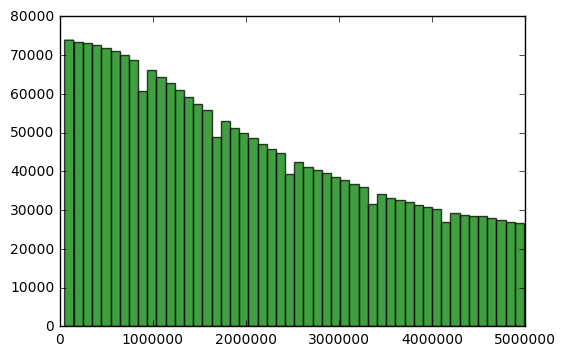

In [351]:
plt.figure(10)
plt.hist(ncispeak[:,1]-ncispeak[:,0], 50, facecolor='green', alpha=0.75)
plt.show()

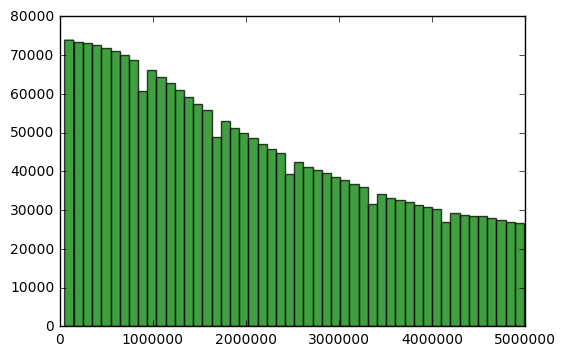

In [352]:
plt.figure(11)
plt.hist(divmeanpeak[:,1]-divmeanpeak[:,0], 50, facecolor='green', alpha=0.75)
plt.show()

In [397]:
dismeanlist = []
rprodlist = []
for i in range(10,500):
    dismeanlist.append(np.mean(np.diag(exphic2,k=i)))
    rprodlist.append(np.prod(r[(i-10):500]))

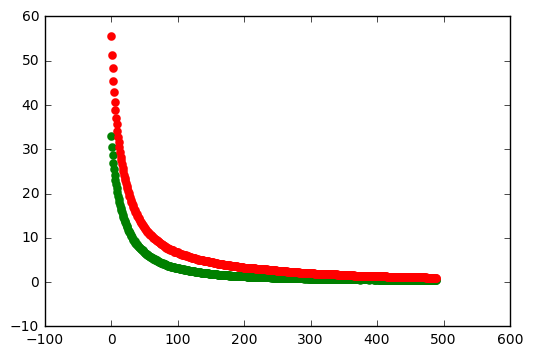

In [411]:
plt.figure(5)
plt.scatter(xrange(490),dismeanlist, s=10, edgecolor='g',label='far',linewidth=3)
plt.scatter(xrange(490),rprodlist, s=10, edgecolor='r',label='far',linewidth=3)
plt.show()

In [416]:
import statsmodels.sandbox.stats.multicomp

In [418]:
statsmodels.sandbox.stats.multicomp.fdrcorrection0([0.05,0.05,0.05,1])

(array([False, False, False, False], dtype=bool),
 array([ 0.06666667,  0.06666667,  0.06666667,  1.        ]))